In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import date, time, datetime, timedelta 

In [2]:
Dataset = pd.read_csv("boston_2019.csv", sep=',')

In [3]:
#first we will reound the time for each hour to have a better sight 
#rounding time 
df = pd.DataFrame(Dataset['start_time'])
df['start_time'] = pd.to_datetime(df.start_time)

# round start_time values to next nearest hour
# name it datetime so that it can be merged with the dates of the weather dataset
df['date_time'] = df['start_time'].dt.round('60min')
df = df.drop('start_time', axis='columns')
df.head()

,date_time
0,2019-01-01 00:00:00
1,2019-01-01 01:00:00
2,2019-01-01 01:00:00
3,2019-01-01 01:00:00
4,2019-01-01 01:00:00


In [4]:
#we will ad user column to the dataframe
df['user'] = Dataset['user_type']
df.head()

,date_time,user
0,2019-01-01 00:00:00,Subscriber
1,2019-01-01 01:00:00,Subscriber
2,2019-01-01 01:00:00,Subscriber
3,2019-01-01 01:00:00,Subscriber
4,2019-01-01 01:00:00,Subscriber


In [5]:
df['hour'] = df['date_time'].dt.hour

In [6]:
#we will group each hour how many subscribers or customers rent a bike 
data1 = df.groupby(["hour","user"]).size()

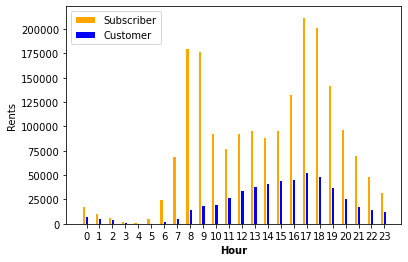

In [7]:
#making the graphik
# set width of bar
barWidth = 0.25

# set height of bar
bars1= data1.loc[(data1.index.get_level_values('user') =="Subscriber")].values
bars2 = data1.loc[(data1.index.get_level_values('user') =="Customer")].values


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='orange', width=barWidth, edgecolor='white', label='Subscriber')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Customer')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], data1.index.get_level_values('hour').unique())

# Create legend & Show graphic
plt.legend()
plt.xlabel("Hour")
plt.ylabel("Rents")
plt.show()

In [8]:
#we will add to the data frame a new column calle day to see 
#on how many bikes on each day of the week were rented (not over the year) 
df['day'] = df['date_time'].dt.day_name()

In [9]:
df['day'] = pd.Categorical(df['day'], categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered = True)

In [10]:
#we will group this as efore but instead of hourly basis, daily basis
data2 = df.groupby(["day","user"]).size()
print(data2)

day        user      
Monday     Customer       62413
           Subscriber    310352
Tuesday    Customer       54829
           Subscriber    329319
Wednesday  Customer       55512
           Subscriber    333930
Thursday   Customer       61860
           Subscriber    324124
Friday     Customer       72876
           Subscriber    312040
Saturday   Customer      121274
           Subscriber    197606
Sunday     Customer      105513
           Subscriber    181123
dtype: int64


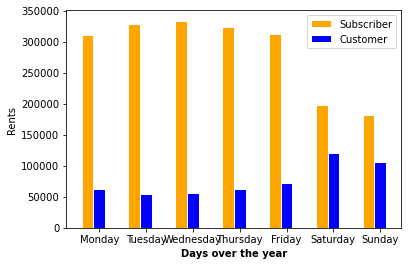

In [11]:
#make the graphik
# set width of bar
barWidth = 0.25

# set height of bar
bars1 = data2.loc[(data2.index.get_level_values('user') =="Subscriber")].values
bars2 = data2.loc[(data2.index.get_level_values('user') =="Customer")].values


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='orange', width=barWidth, edgecolor='white', label='Subscriber')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Customer')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], data2.index.get_level_values('day').unique())

# Create legend & Show graphic
plt.legend()
plt.xlabel("Days over the year")
plt.ylabel("Rents")
plt.show()

In [12]:
#add month column to see te month of the row
df['month'] = df['date_time'].dt.month_name()
#to make the months in order
df['month'] = pd.Categorical(df['month'], categories = ['January','February','March','April','May','June','July','August','September','October','November','December'],ordered = True)

In [13]:
#grouping on monthly basis 
data3 = df.groupby(["month","user"]).size()
print(data3)

month      user      
January    Customer        4788
           Subscriber     65104
February   Customer        6774
           Subscriber     73676
March      Customer       14522
           Subscriber     87859
April      Customer       34810
           Subscriber    131865
May        Customer       51982
           Subscriber    171059
June       Customer       73708
           Subscriber    200401
July       Customer       82105
           Subscriber    234914
August     Customer       87334
           Subscriber    250134
September  Customer       82191
           Subscriber    281049
October    Customer       56709
           Subscriber    248806
November   Customer       28447
           Subscriber    162325
December   Customer       10907
           Subscriber     81302
dtype: int64


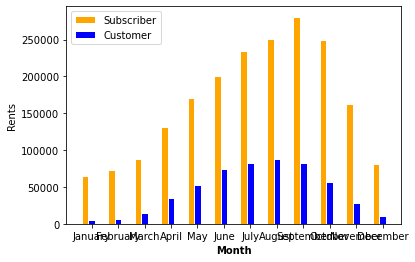

In [14]:
#making the graphik
# set width of bar
barWidth = 0.25

# set height of bar
bars1= data3.loc[(data3.index.get_level_values('user') =="Subscriber")].values
bars2 = data3.loc[(data3.index.get_level_values('user') =="Customer")].values


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='orange', width=barWidth, edgecolor='white', label='Subscriber')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Customer')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], data3.index.get_level_values('month').unique())

# Create legend & Show graphic
plt.legend()
plt.xlabel("Month")
plt.ylabel("Rents")
plt.show()

In [15]:
#to check how many rents over the weeks on a year
df['week_of_the_year'] = df['date_time'].dt.isocalendar().week

In [16]:
#grouping weekly basis
data4 = df.groupby(["week_of_the_year","user"]).size()
print(data4)

week_of_the_year  user      
1                 Customer       1654
                  Subscriber    13580
2                 Customer        962
                  Subscriber    16653
3                 Customer        988
                                ...  
50                Subscriber    26312
51                Customer       1750
                  Subscriber    18452
52                Customer       2939
                  Subscriber    10612
Length: 104, dtype: int64


In [17]:
#making the graphik, i have a little bit of troubles, ill fix it later
# set width of bar


In [18]:
#new data frame to check the average drive time
df2 = pd.DataFrame(Dataset['start_time'])
df2['start_time'] = pd.to_datetime(df2.start_time)

In [19]:
#we will need start time as well as end time to 
#calculate the drove time
df2['end_time'] = pd.to_datetime(Dataset['end_time']) 

In [20]:
#new column will be added witch the time on a date format
df2['drive_time_in_date'] = df2['end_time']-df2['start_time']
df2.head()

,start_time,end_time,drive_time_in_date
0,2019-01-01 00:09:13.798,2019-01-01 00:15:25.336,0 days 00:06:11.538000
1,2019-01-01 00:33:56.182,2019-01-01 00:38:20.880,0 days 00:04:24.698000
2,2019-01-01 00:41:54.600,2019-01-01 00:49:33.273,0 days 00:07:38.673000
3,2019-01-01 00:43:32.571,2019-01-01 00:49:37.426,0 days 00:06:04.855000
4,2019-01-01 00:49:56.464,2019-01-01 01:01:17.701,0 days 00:11:21.237000


In [21]:
#new column transforming each date format of the drive to seconds
df2['time_in_seconds'] = df2['drive_time_in_date'].dt.total_seconds() 

In [22]:
#new column of drive time in second to minutes 
df2['time_in_minutes'] = df2['time_in_seconds']/60

In [23]:
#we need now a new column with the rounded time
df2['date_time'] = df2['start_time'].dt.round('60min')

In [24]:
data5 = df2.groupby("date_time")['time_in_minutes'].mean().reset_index()
print(data5)

               date_time  time_in_minutes
0    2019-01-01 00:00:00         6.192300
1    2019-01-01 01:00:00        17.870506
2    2019-01-01 02:00:00        45.232271
3    2019-01-01 03:00:00        16.173113
4    2019-01-01 04:00:00         5.885225
...                  ...              ...
8697 2019-12-31 20:00:00        14.821820
8698 2019-12-31 21:00:00        22.375911
8699 2019-12-31 22:00:00        12.014348
8700 2019-12-31 23:00:00        19.632486
8701 2020-01-01 00:00:00        10.458193

[8702 rows x 2 columns]


In [25]:
df2['Day'] = df2['date_time'].dt.day_name()
df2.head()

,start_time,end_time,drive_time_in_date,time_in_seconds,time_in_minutes,date_time,Day
0,2019-01-01 00:09:13.798,2019-01-01 00:15:25.336,0 days 00:06:11.538000,371.538,6.192300,2019-01-01 00:00:00,Tuesday
1,2019-01-01 00:33:56.182,2019-01-01 00:38:20.880,0 days 00:04:24.698000,264.698,4.411633,2019-01-01 01:00:00,Tuesday
2,2019-01-01 00:41:54.600,2019-01-01 00:49:33.273,0 days 00:07:38.673000,458.673,7.644550,2019-01-01 01:00:00,Tuesday
3,2019-01-01 00:43:32.571,2019-01-01 00:49:37.426,0 days 00:06:04.855000,364.855,6.080917,2019-01-01 01:00:00,Tuesday
4,2019-01-01 00:49:56.464,2019-01-01 01:01:17.701,0 days 00:11:21.237000,681.237,11.353950,2019-01-01 01:00:00,Tuesday


In [26]:
df2['Day'] = pd.Categorical(df2['Day'], categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered = True)

In [27]:
data6 = df2.groupby("Day")['time_in_minutes'].mean().reset_index()
data6 = data6.sort_index()
print(data6)

         Day  time_in_minutes
0     Monday        30.006112
1    Tuesday        29.052584
2  Wednesday        27.490968
3   Thursday        34.440894
4     Friday        35.500755
5   Saturday        57.827408
6     Sunday        45.916167


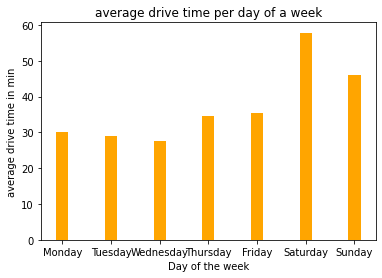

In [28]:
#graphic of the average drive time of the days over a year
plt.bar(data6['Day'],data6['time_in_minutes'], width=0.25, color='orange')
plt.xlabel('Day of the week')
plt.ylabel('average drive time in min')
plt.title('average drive time per day of a week')
plt.figure.figsize=(15,15)


In [29]:
#creating another column named month to have each month number 
df2['Month'] = df2['date_time'].dt.month_name()

In [30]:
#to make the months in order
df2['Month'] = pd.Categorical(df2['Month'], categories = ['January','February','March','April','May','June','July','August','September','October','November','December'],ordered = True)

In [31]:
data7 = df2.groupby("Month")['time_in_minutes'].mean().reset_index()


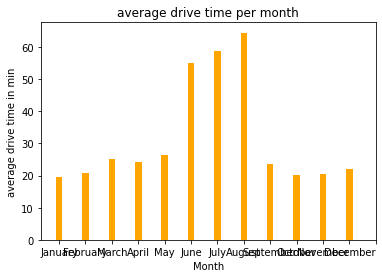

In [32]:
#graphic of the average drive time evry month of the year
plt.bar(data7['Month'],data7['time_in_minutes'], width=0.25, color='orange')
plt.xlabel('Month')
plt.xticks(range(0,13))
plt.ylabel('average drive time in min')
plt.title('average drive time per month')
plt.figure.figsize=(15,15)


In [33]:
#data of average time of every week of the year
df2 ['week'] = df2['date_time'].dt.isocalendar().week
data8 = df2.groupby("week")['time_in_minutes'].mean().reset_index()


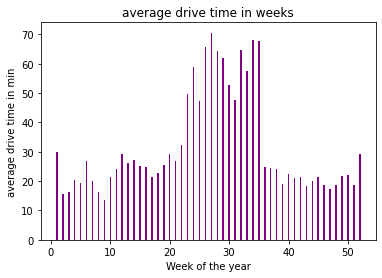

In [34]:
#graphic fot the average drive time of every week of the year 
plt.bar(data8['week'],data8['time_in_minutes'], width=0.25, color='purple')
plt.xlabel('Week of the year')
plt.ylabel('average drive time in min')
plt.title('average drive time in weeks')
plt.figure.figsize=(15,15)

In [35]:
data9 = df2.groupby(df2.date_time.dt.hour)['time_in_minutes'].mean().reset_index()
print(data9)

    date_time  time_in_minutes
0           0        66.432258
1           1       115.169429
2           2       225.179291
3           3       182.504250
4           4       255.978662
5           5        49.941348
6           6        19.844058
7           7        22.284825
8           8        17.641505
9           9        16.448875
10         10        26.350023
11         11        27.896390
12         12        35.247838
13         13        35.772656
14         14        33.699356
15         15        46.791930
16         16        43.954416
17         17        30.406589
18         18        35.109946
19         19        41.071022
20         20        45.152605
21         21        33.213633
22         22        60.584616
23         23        72.697849


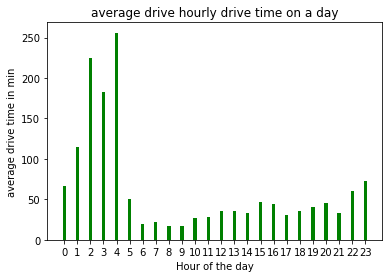

In [36]:
#graphic fot the average drive time of every week of the year 
plt.bar(data9['date_time'],data9['time_in_minutes'], width=0.25, color='green')
plt.xlabel('Hour of the day')
plt.xticks(range(0,24))
plt.ylabel('average drive time in min')
plt.title('average drive hourly drive time on a day')
plt.figure.figsize=(15,15)